In [1]:
import evaluation 
import importlib
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [2]:
from shallow_models.shallow_ensembles import RegressionEnsemble as ShallowEnsemble
import shallow_models
importlib.reload(shallow_models)

<module 'shallow_models' from '/Users/thomas/Documents/Master-Thesis/new_version/shallow_models/__init__.py'>

In [3]:
import ensembles
import networks
importlib.reload(networks)
import dataset_creation
import tensorflow as tf
import base
import numpy as np
#from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap

In [4]:
trials = 3

num_neurons = [[10,10,10],[5,10,5],[10,5,10],[50,30,20],[1,1,1],[50,20,30],[50,50,50]]
seeds = [50,100,150,200,25,1,50]
num_layers = len(num_neurons[0])
learning_rates = [0.1,0.01,0.001]#np.arange(0.01,0.1,0.005)#np.arange(0.1,0.01,0.001)#
#AdamWOptimizer = tf.contrib.opt.extend_with_decoupled_weight_decay(tf.train.AdamOptimizer)


#tf.contrib.opt.AdamWOptimizer]
#tf.contrib.opt.NadamOptimizer
#learning_rates   = (learning_rates-min(learning_rates))/(max(learning_rates)-min(learning_rates))

activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers,[tf.nn.relu]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
optimizers = [tf.contrib.opt.NadamOptimizer, tf.train.AdamOptimizer]#, tf.train.MomentumOptimizer]#,AdamWOptimizer]#, tf.contrib.opt.AdamWOptimizer]



param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             'learning_rate':learning_rates,
              'optimizer':optimizers,
             'seed':seeds,
             'l2':[True,False]
             }


model_num_neurons = [30,50,30,10]
model_params = {
    'seed':50,
    'learning_rate':0.002,
    'num_neurons':model_num_neurons,
    'activations':[tf.nn.leaky_relu]*len(model_num_neurons),
    'optimizer': tf.contrib.opt.NadamOptimizer,
    'initialisation_scheme':tf.keras.initializers.he_normal, #tf.contrib.layers.xavier_initializer#
    #'l':0.05,
    
}
#thompson_model = networks.DropoutNetwork
#thompson_model = ensembles.BootstrapThroughTimeBobStrap
thompson_model=ensembles.BootstrapEnsemble
#thompson_model = ensembles.ForcedDiversityBootstrapThroughTime3

ds = dataset_creation.NonlinearDataset
decay_factor = 1.5

In [5]:
learning_rates

[0.1, 0.01, 0.001]

In [6]:
tg = evaluation.ThompsonGridSearch(param_grid=param_grid, 
                                   dataset_creator=ds, 
                                   thompson_model=thompson_model,
                                   test_model=networks.NlpdNetwork,
                                  model_params=model_params,
                                  decay_factor=decay_factor)

initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>


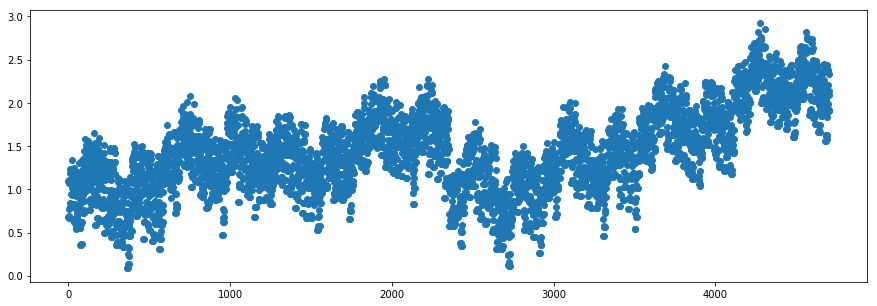

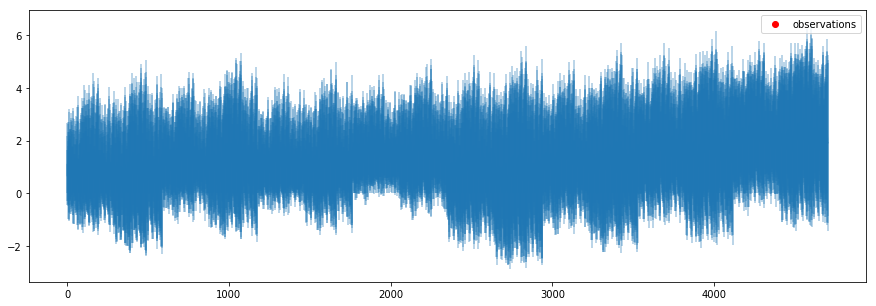

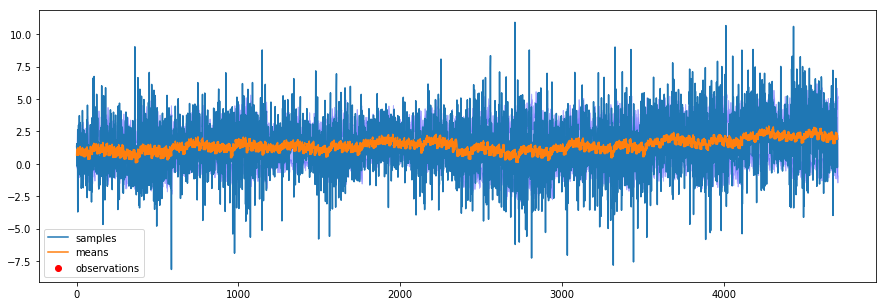

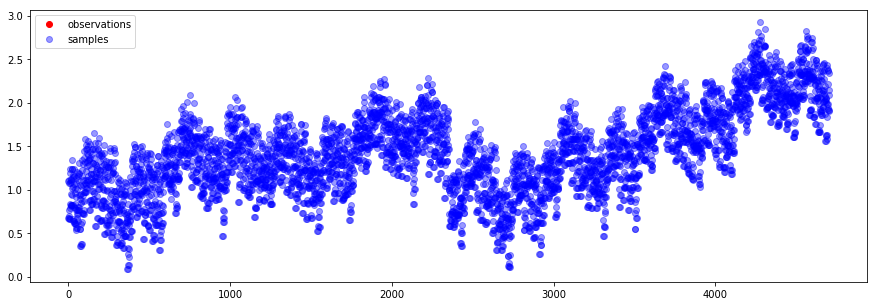

In [7]:
tg.plot_sample_grid()

length of the new dataset: (26, 2)
new X is in there: True
new y is in there: True
mean probability is 1.0


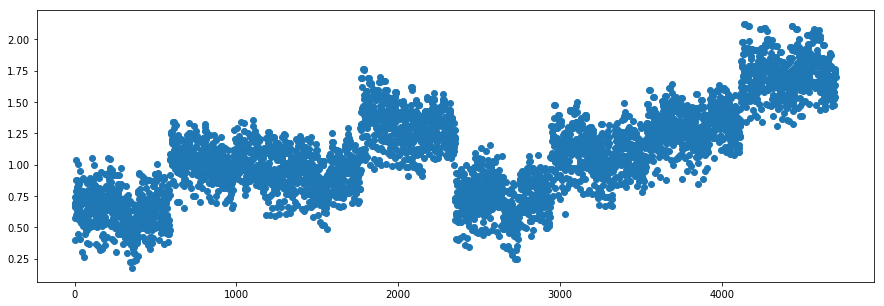

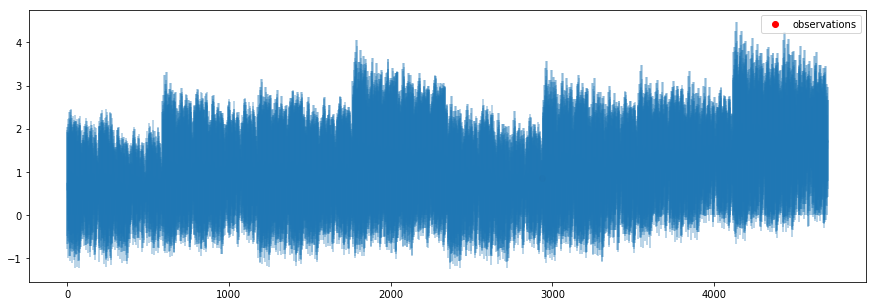

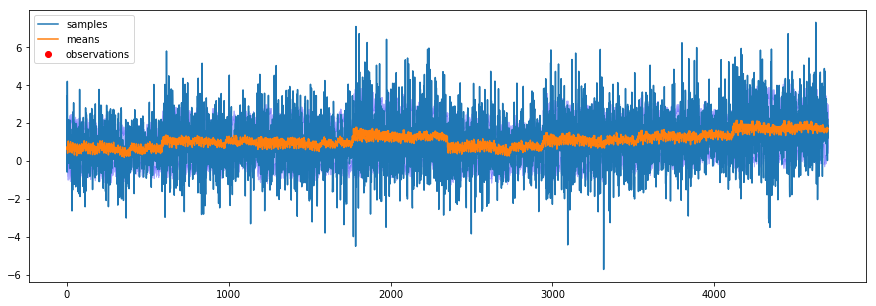

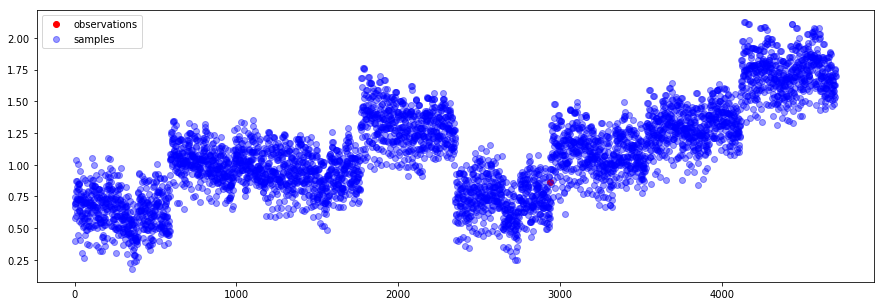

In [8]:
tg.goforit(1)
tg.plot_sample_grid()

length of the new dataset: (26, 2)
new X is in there: True
new y is in there: True
mean probability is 0.6666666666666666
length of the new dataset: (26, 3)
new X is in there: True
new y is in there: True
mean probability is 0.75
length of the new dataset: (26, 2)
new X is in there: True
new y is in there: True
mean probability is 0.4
length of the new dataset: (26, 3)
new X is in there: True
new y is in there: True
mean probability is 0.5
length of the new dataset: (26, 4)
new X is in there: True
new y is in there: True
mean probability is 0.5714285714285714
length of the new dataset: (26, 4)
new X is in there: True
new y is in there: True
mean probability is 0.5
length of the new dataset: (26, 6)
new X is in there: True
new y is in there: True
mean probability is 0.6666666666666666
length of the new dataset: (26, 9)
new X is in there: True
new y is in there: True
mean probability is 0.9
length of the new dataset: (26, 3)
new X is in there: True
new y is in there: True
mean probabilit

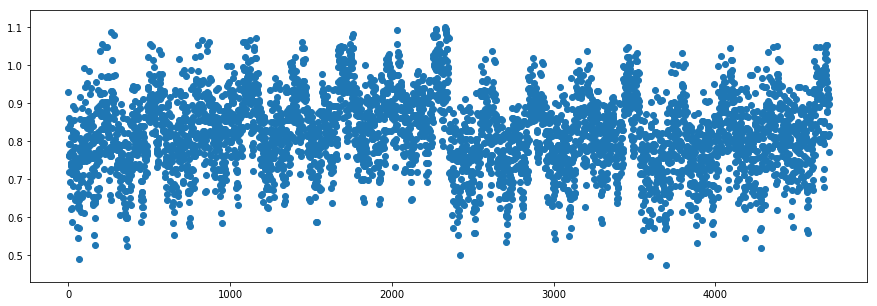

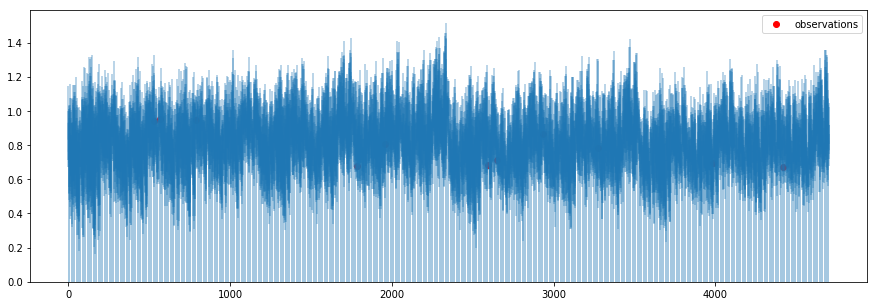

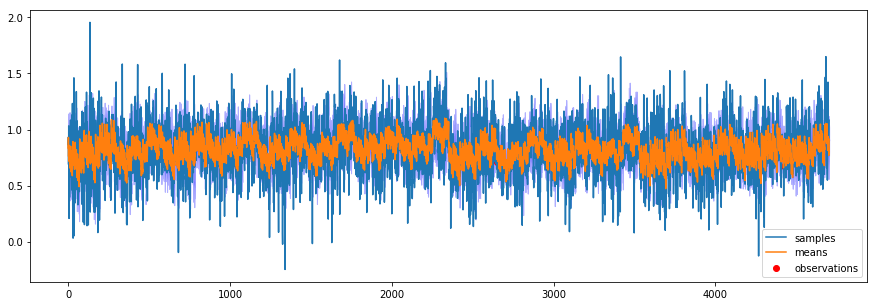

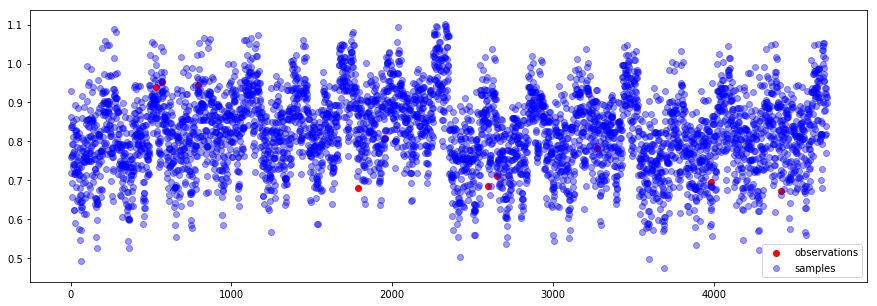

In [9]:
tg.goforit(10)
tg.plot_sample_grid()

In [10]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
    <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>],
   'initialisation_scheme': <function tensorflow.contrib.layers.python.layers.initializers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32)>,
   'l2': False,
   'learning_rate': 0.1,
   'num_neurons': [10, 10, 10],
   'optimizer': tensorflow.python.training.adam.AdamOptimizer,
   'seed': 25},
  'score': 0.6731611457451147,
  'X': array([[0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0]], dtype=uint8)},
 {'params': {'activations'

length of the new dataset: (26, 9)
new X is in there: True
new y is in there: True
mean probability is 0.6923076923076923
length of the new dataset: (26, 6)
new X is in there: True
new y is in there: True
mean probability is 0.42857142857142855
length of the new dataset: (26, 8)
new X is in there: True
new y is in there: True
mean probability is 0.5333333333333333
length of the new dataset: (26, 11)
new X is in there: True
new y is in there: True
mean probability is 0.6875
length of the new dataset: (26, 8)
new X is in there: True
new y is in there: True
mean probability is 0.47058823529411764
length of the new dataset: (26, 10)
new X is in there: True
new y is in there: True
mean probability is 0.5555555555555556
length of the new dataset: (26, 12)
new X is in there: True
new y is in there: True
mean probability is 0.631578947368421
length of the new dataset: (26, 10)
new X is in there: True
new y is in there: True
mean probability is 0.5
length of the new dataset: (26, 10)
new X is i

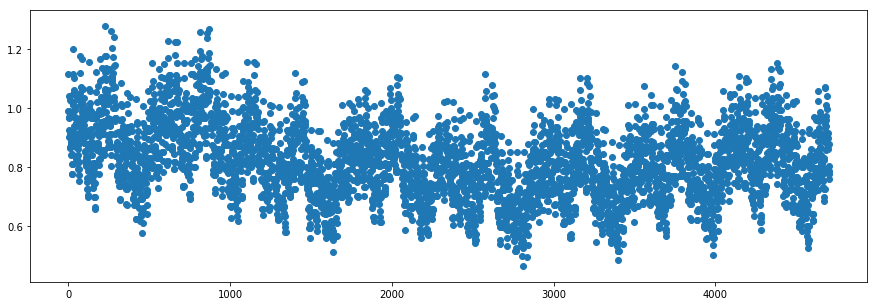

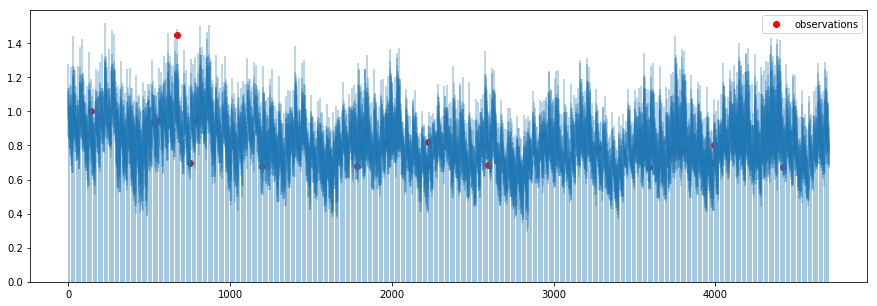

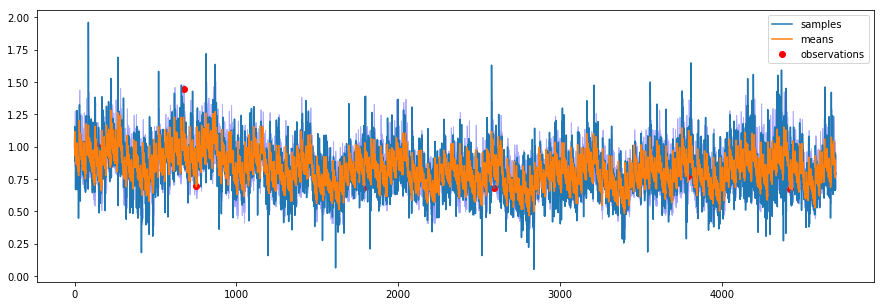

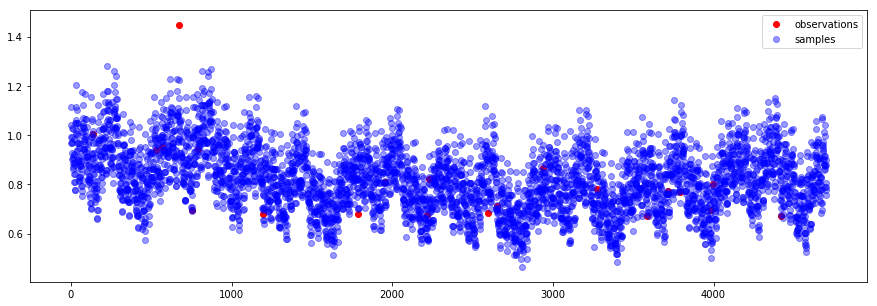

In [11]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 14)
new X is in there: True
new y is in there: True
mean probability is 0.6086956521739131
length of the new dataset: (26, 12)
new X is in there: True
new y is in there: True
mean probability is 0.5
length of the new dataset: (26, 12)
new X is in there: True
new y is in there: True
mean probability is 0.48
length of the new dataset: (26, 16)
new X is in there: True
new y is in there: True
mean probability is 0.6153846153846154
length of the new dataset: (26, 12)
new X is in there: True
new y is in there: True
mean probability is 0.4444444444444444
length of the new dataset: (26, 15)
new X is in there: True
new y is in there: True
mean probability is 0.5357142857142857
length of the new dataset: (26, 14)
new X is in there: True
new y is in there: True
mean probability is 0.4827586206896552
length of the new dataset: (26, 14)
new X is in there: True
new y is in there: True
mean probability is 0.4666666666666667
length of the new dataset: (26, 18)
new X is 

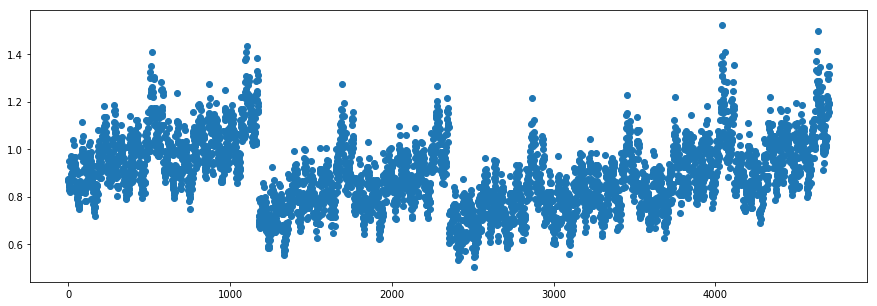

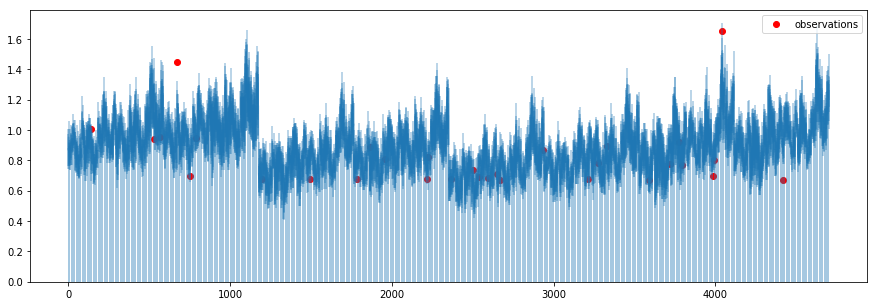

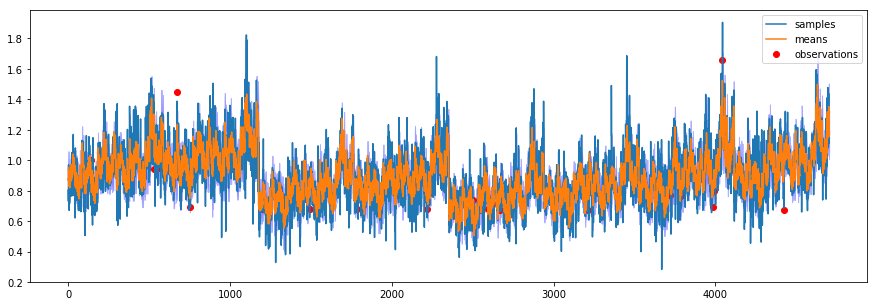

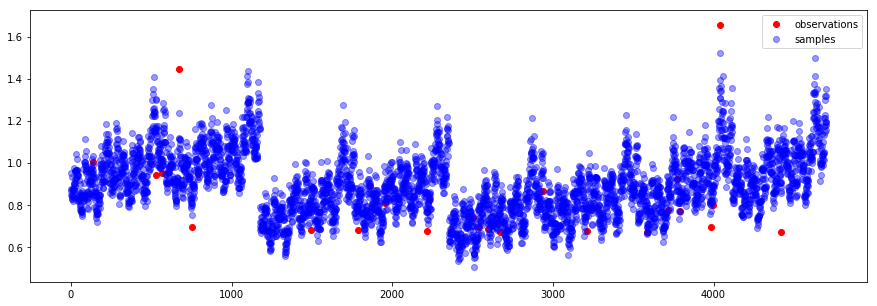

In [12]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 18)
new X is in there: True
new y is in there: True
mean probability is 0.5454545454545454
length of the new dataset: (26, 21)
new X is in there: True
new y is in there: True
mean probability is 0.6176470588235294
length of the new dataset: (26, 22)
new X is in there: True
new y is in there: True
mean probability is 0.6285714285714286
length of the new dataset: (26, 16)
new X is in there: True
new y is in there: True
mean probability is 0.4444444444444444
length of the new dataset: (26, 18)
new X is in there: True
new y is in there: True
mean probability is 0.4864864864864865
length of the new dataset: (26, 24)
new X is in there: True
new y is in there: True
mean probability is 0.631578947368421
length of the new dataset: (26, 17)
new X is in there: True
new y is in there: True
mean probability is 0.4358974358974359
length of the new dataset: (26, 18)
new X is in there: True
new y is in there: True
mean probability is 0.45
length of the new dataset: (26,

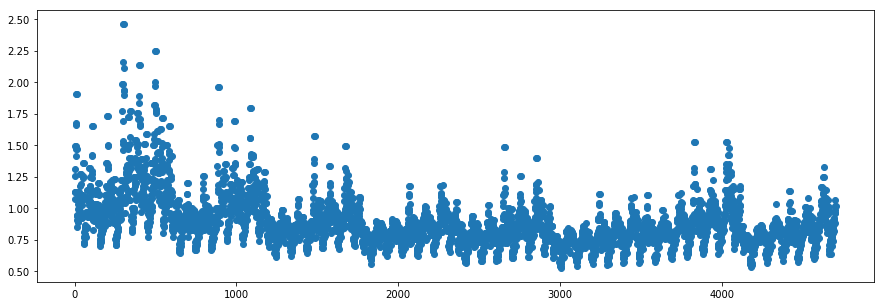

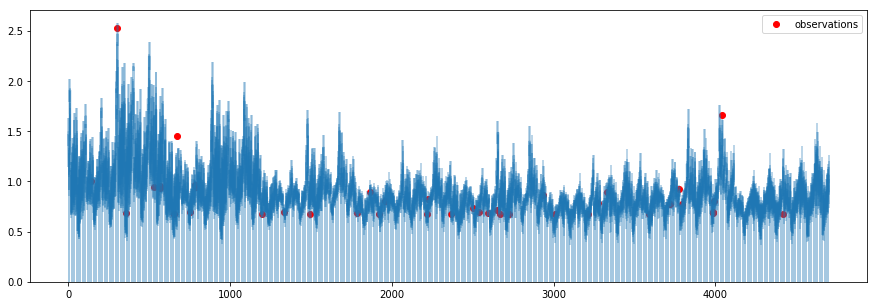

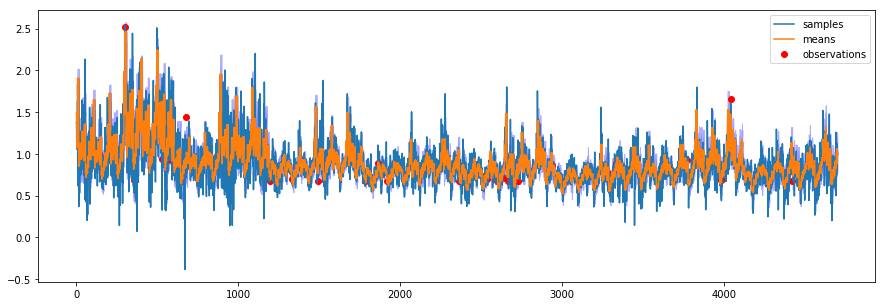

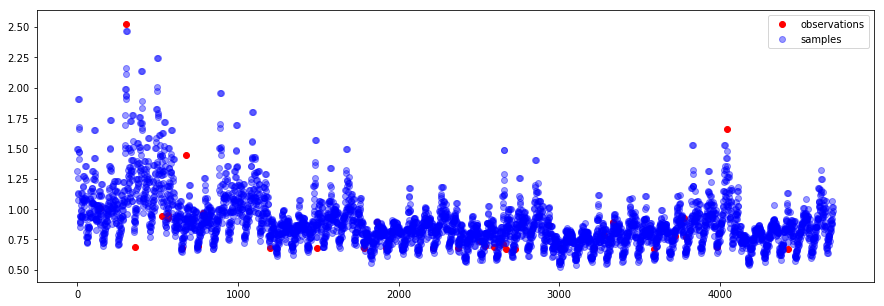

In [13]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 21)
new X is in there: True
new y is in there: True
mean probability is 0.4883720930232558
length of the new dataset: (26, 17)
new X is in there: True
new y is in there: True
mean probability is 0.38636363636363635
length of the new dataset: (26, 19)
new X is in there: True
new y is in there: True
mean probability is 0.4222222222222222
length of the new dataset: (26, 15)
new X is in there: True
new y is in there: True
mean probability is 0.32608695652173914
length of the new dataset: (26, 22)
new X is in there: True
new y is in there: True
mean probability is 0.46808510638297873
length of the new dataset: (26, 22)
new X is in there: True
new y is in there: True
mean probability is 0.4583333333333333
length of the new dataset: (26, 20)
new X is in there: True
new y is in there: True
mean probability is 0.40816326530612246
length of the new dataset: (26, 24)
new X is in there: True
new y is in there: True
mean probability is 0.48
length of the new dataset:

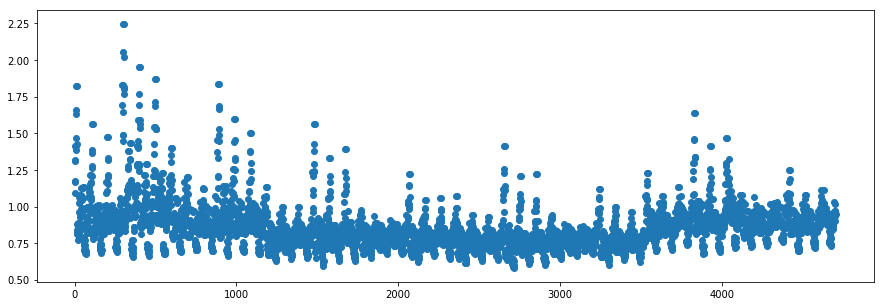

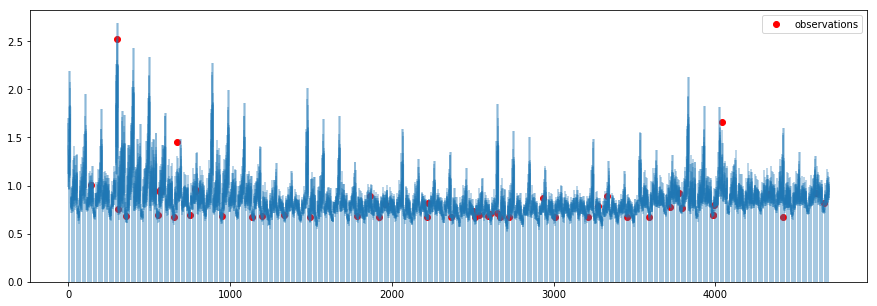

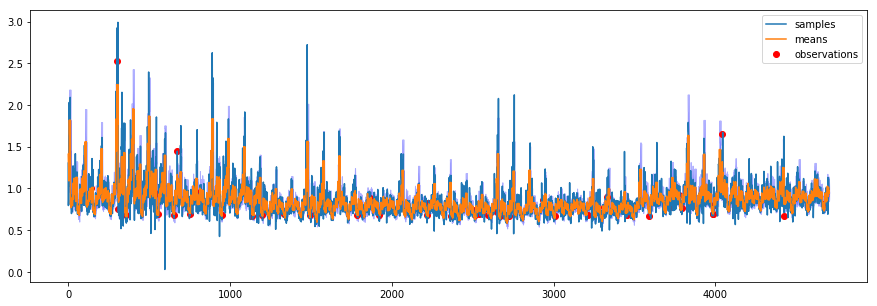

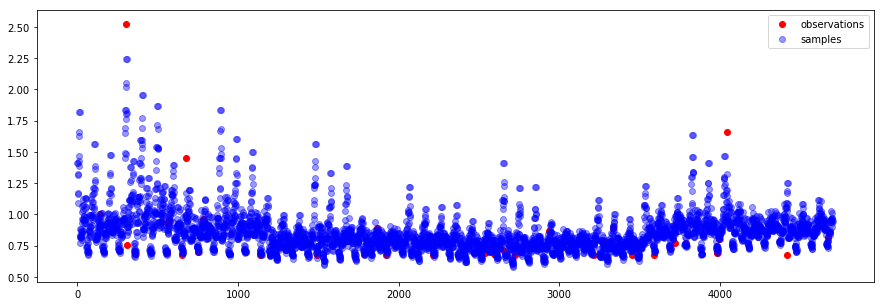

In [14]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 27)
new X is in there: True
new y is in there: True
mean probability is 0.5094339622641509
length of the new dataset: (26, 25)
new X is in there: True
new y is in there: True
mean probability is 0.46296296296296297
length of the new dataset: (26, 20)
new X is in there: True
new y is in there: True
mean probability is 0.36363636363636365
length of the new dataset: (26, 16)
new X is in there: True
new y is in there: True
mean probability is 0.2857142857142857
length of the new dataset: (26, 30)
new X is in there: True
new y is in there: True
mean probability is 0.5263157894736842
length of the new dataset: (26, 23)
new X is in there: True
new y is in there: True
mean probability is 0.39655172413793105
length of the new dataset: (26, 25)
new X is in there: True
new y is in there: True
mean probability is 0.423728813559322
length of the new dataset: (26, 22)
new X is in there: True
new y is in there: True
mean probability is 0.36666666666666664
length of the

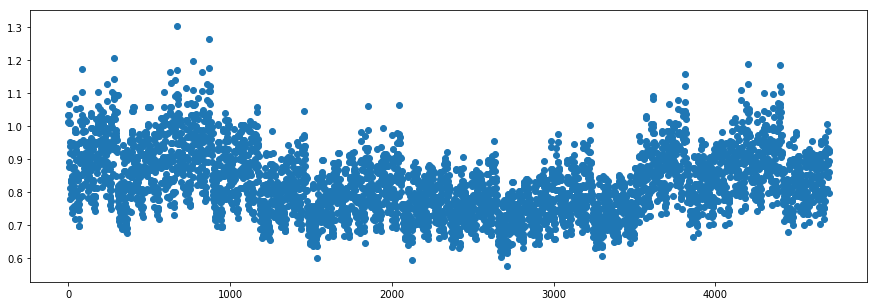

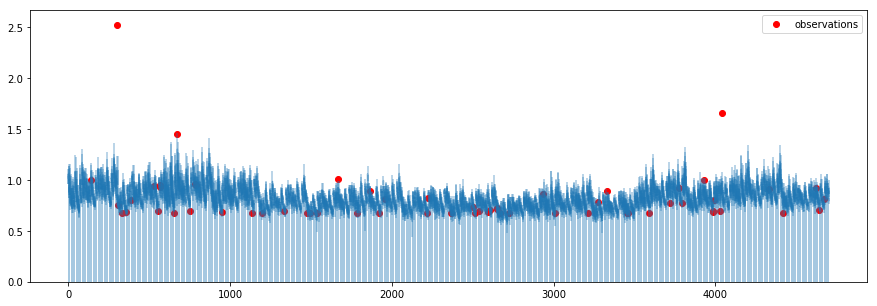

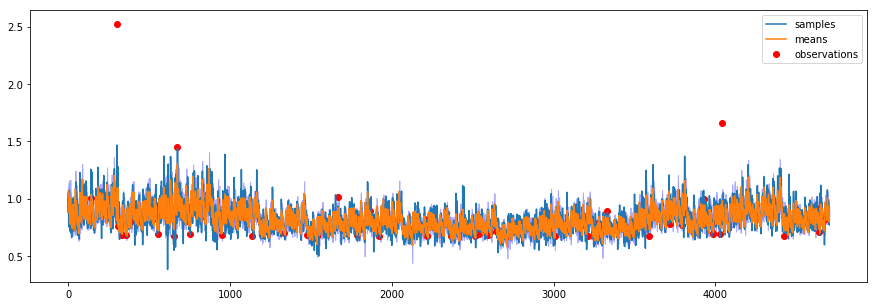

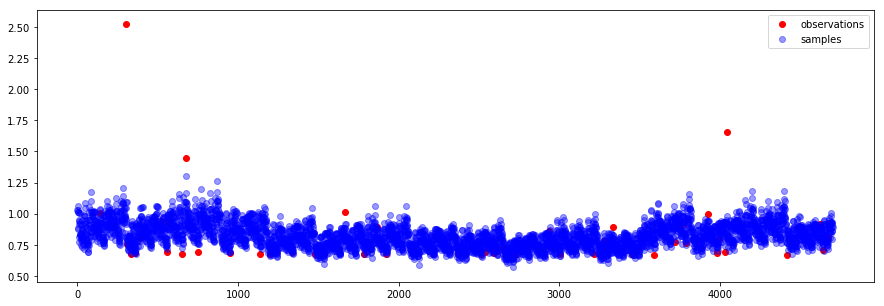

In [15]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 29)
new X is in there: True
new y is in there: True
mean probability is 0.4603174603174603
length of the new dataset: (26, 28)
new X is in there: True
new y is in there: True
mean probability is 0.4375
length of the new dataset: (26, 26)
new X is in there: True
new y is in there: True
mean probability is 0.4
length of the new dataset: (26, 23)
new X is in there: True
new y is in there: True
mean probability is 0.3484848484848485
length of the new dataset: (26, 28)
new X is in there: True
new y is in there: True
mean probability is 0.417910447761194
length of the new dataset: (26, 25)
new X is in there: True
new y is in there: True
mean probability is 0.36764705882352944
length of the new dataset: (26, 35)
new X is in there: True
new y is in there: True
mean probability is 0.5072463768115942
length of the new dataset: (26, 30)
new X is in there: True
new y is in there: True
mean probability is 0.42857142857142855
length of the new dataset: (26, 26)
new X 

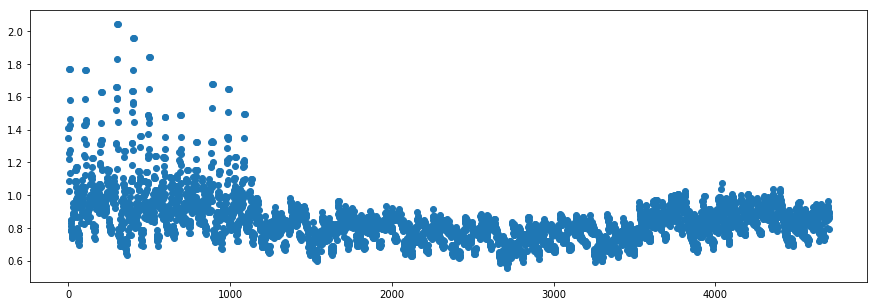

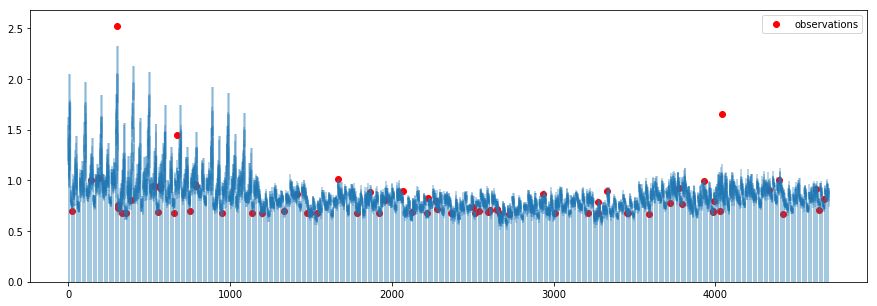

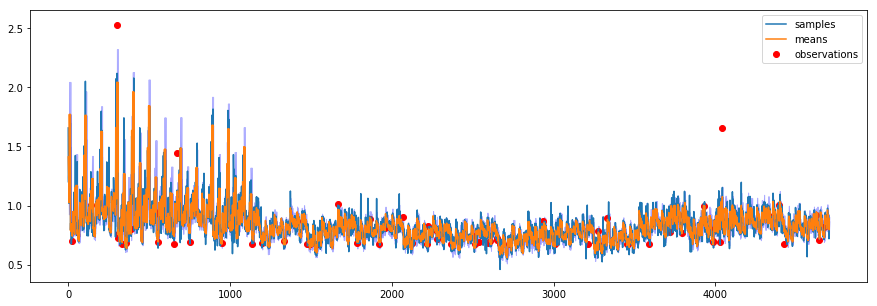

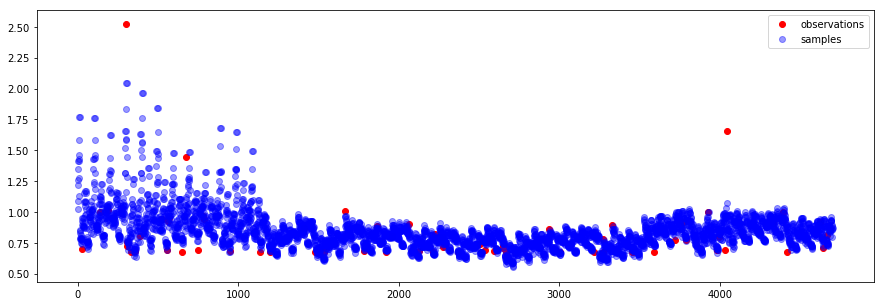

In [16]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 33)
new X is in there: True
new y is in there: True
mean probability is 0.4520547945205479
length of the new dataset: (26, 33)
new X is in there: True
new y is in there: True
mean probability is 0.44594594594594594
length of the new dataset: (26, 32)
new X is in there: True
new y is in there: True
mean probability is 0.4266666666666667
length of the new dataset: (26, 30)
new X is in there: True
new y is in there: True
mean probability is 0.39473684210526316
length of the new dataset: (26, 36)
new X is in there: True
new y is in there: True
mean probability is 0.4675324675324675
length of the new dataset: (26, 26)
new X is in there: True
new y is in there: True
mean probability is 0.3333333333333333
length of the new dataset: (26, 29)
new X is in there: True
new y is in there: True
mean probability is 0.3670886075949367
length of the new dataset: (26, 39)
new X is in there: True
new y is in there: True
mean probability is 0.4875
length of the new dataset:

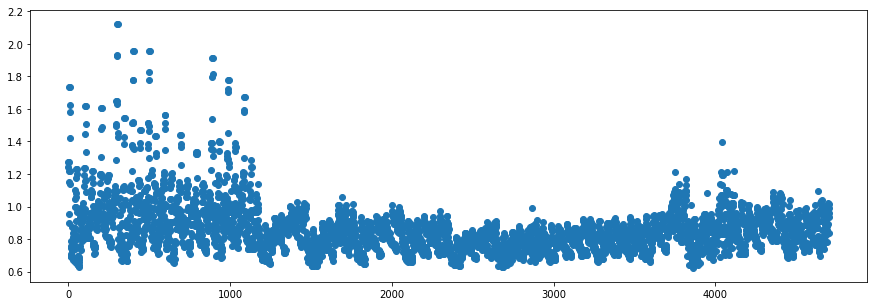

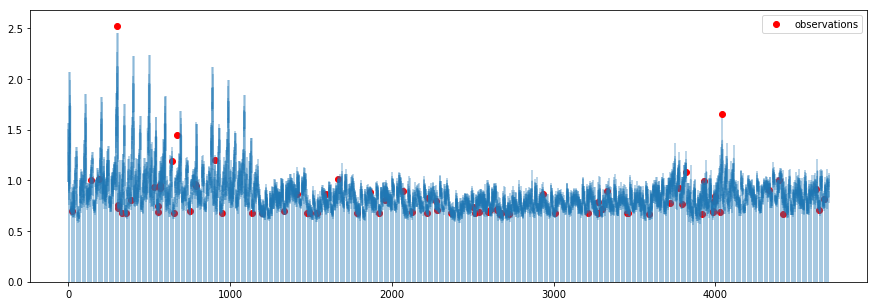

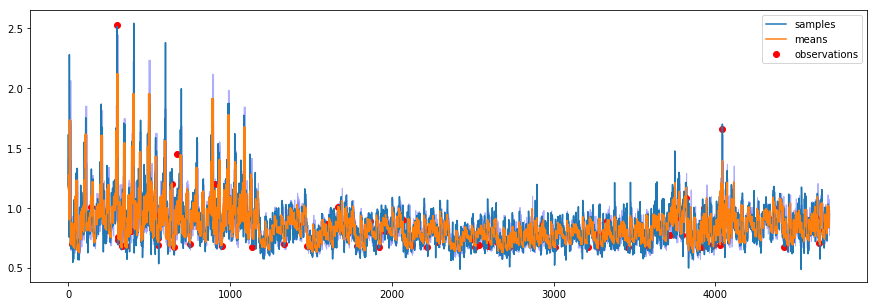

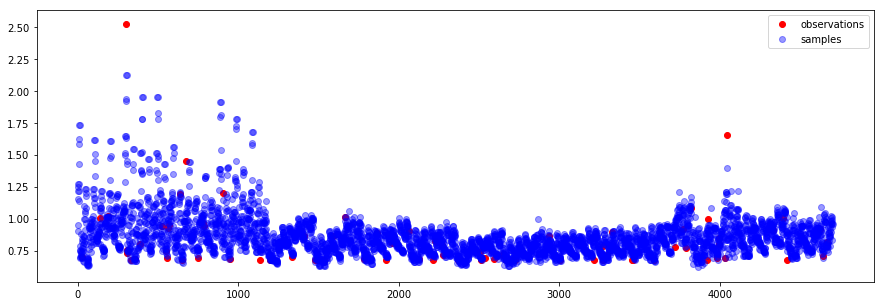

In [17]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 36)
new X is in there: True
new y is in there: True
mean probability is 0.43373493975903615
length of the new dataset: (26, 33)
new X is in there: True
new y is in there: True
mean probability is 0.39285714285714285
length of the new dataset: (26, 36)
new X is in there: True
new y is in there: True
mean probability is 0.4235294117647059
length of the new dataset: (26, 34)
new X is in there: True
new y is in there: True
mean probability is 0.3953488372093023
length of the new dataset: (26, 29)
new X is in there: True
new y is in there: True
mean probability is 0.3333333333333333
length of the new dataset: (26, 34)
new X is in there: True
new y is in there: True
mean probability is 0.38636363636363635
length of the new dataset: (26, 37)
new X is in there: True
new y is in there: True
mean probability is 0.4157303370786517
length of the new dataset: (26, 35)
new X is in there: True
new y is in there: True
mean probability is 0.3888888888888889
length of the

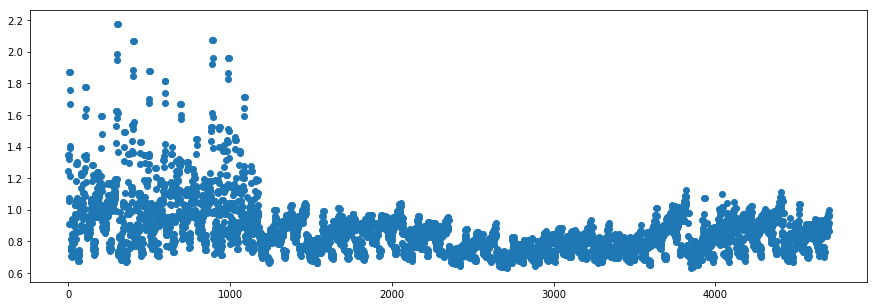

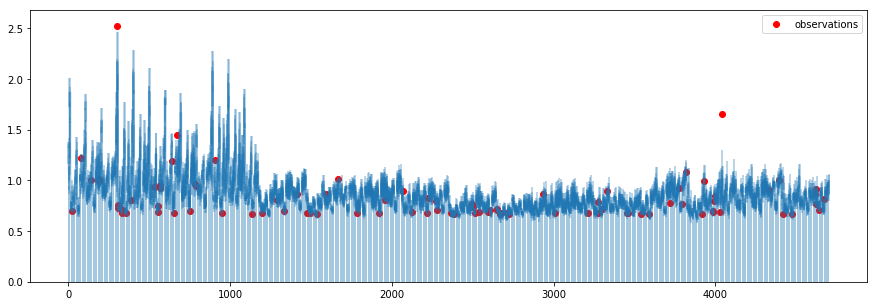

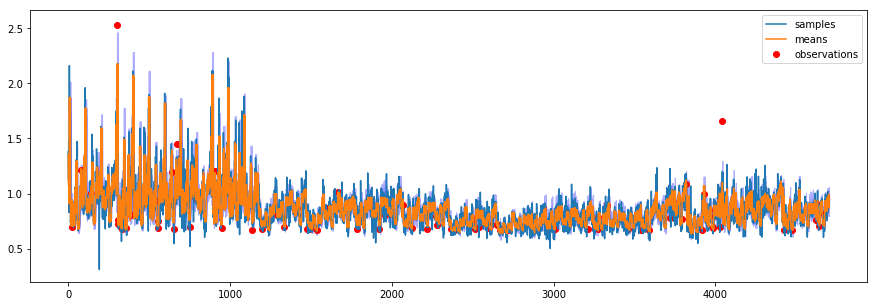

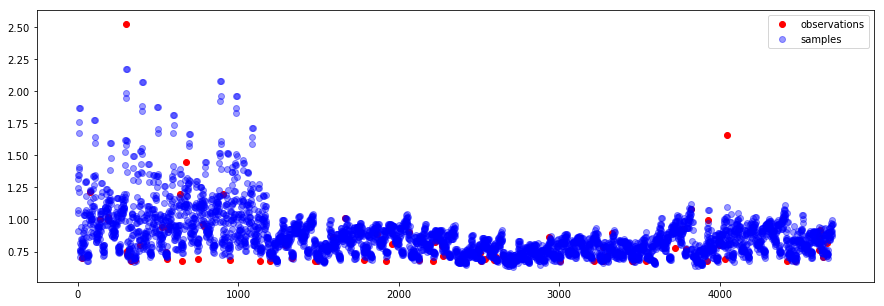

In [18]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 40)
new X is in there: True
new y is in there: True
mean probability is 0.43010752688172044
length of the new dataset: (26, 34)
new X is in there: True
new y is in there: True
mean probability is 0.3617021276595745
length of the new dataset: (26, 34)
new X is in there: True
new y is in there: True
mean probability is 0.35789473684210527
length of the new dataset: (26, 37)
new X is in there: True
new y is in there: True
mean probability is 0.3854166666666667
length of the new dataset: (26, 37)
new X is in there: True
new y is in there: True
mean probability is 0.38144329896907214
length of the new dataset: (26, 41)
new X is in there: True
new y is in there: True
mean probability is 0.41836734693877553
length of the new dataset: (26, 35)
new X is in there: True
new y is in there: True
mean probability is 0.35353535353535354
length of the new dataset: (26, 35)
new X is in there: True
new y is in there: True
mean probability is 0.35
length of the new dataset

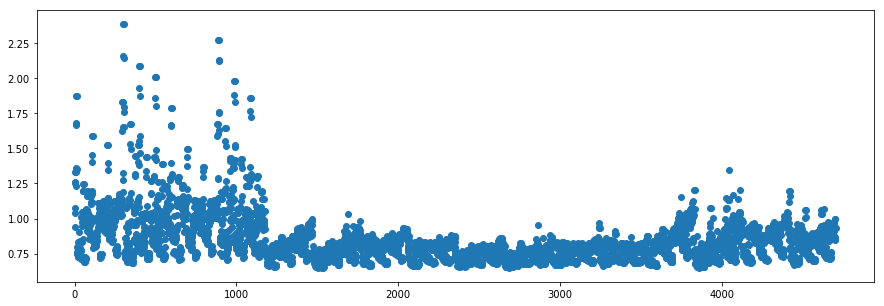

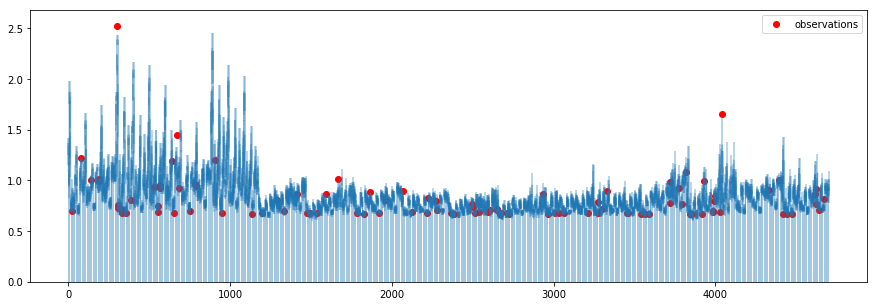

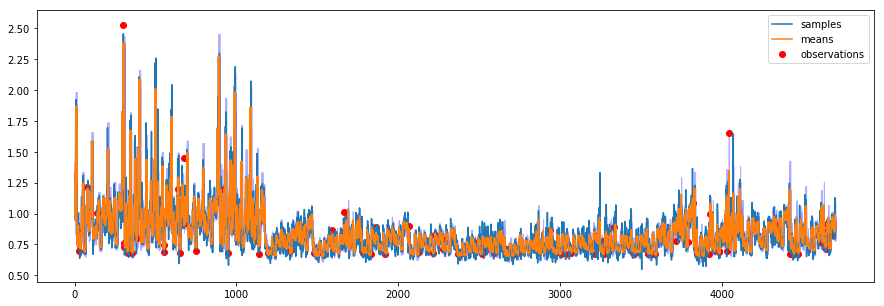

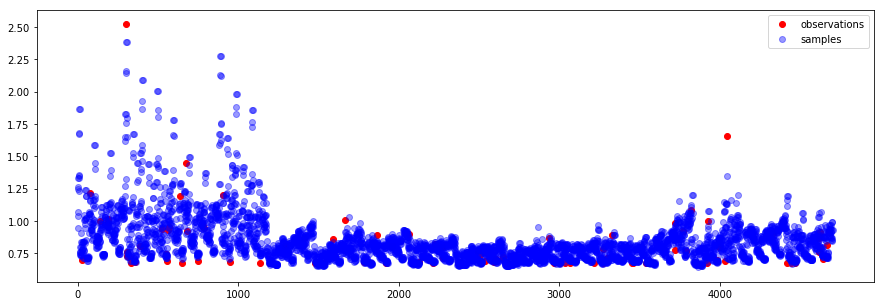

In [19]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 43)
new X is in there: True
new y is in there: True
mean probability is 0.4174757281553398
length of the new dataset: (26, 40)
new X is in there: True
new y is in there: True
mean probability is 0.38461538461538464
length of the new dataset: (26, 34)
new X is in there: True
new y is in there: True
mean probability is 0.3238095238095238
length of the new dataset: (26, 43)
new X is in there: True
new y is in there: True
mean probability is 0.4056603773584906
length of the new dataset: (26, 38)
new X is in there: True
new y is in there: True
mean probability is 0.35514018691588783
length of the new dataset: (26, 40)
new X is in there: True
new y is in there: True
mean probability is 0.37037037037037035
length of the new dataset: (26, 42)
new X is in there: True
new y is in there: True
mean probability is 0.3853211009174312
length of the new dataset: (26, 34)
new X is in there: True
new y is in there: True
mean probability is 0.3090909090909091
length of the

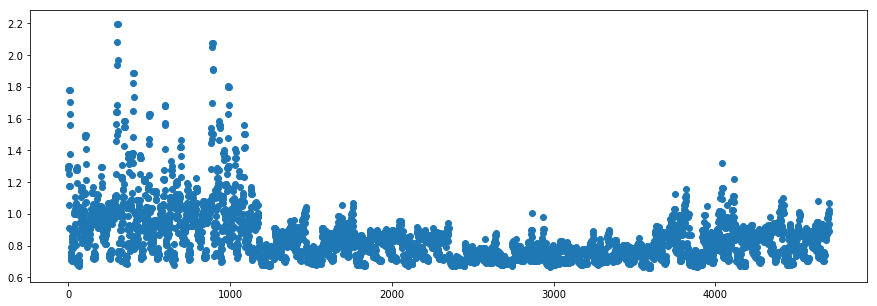

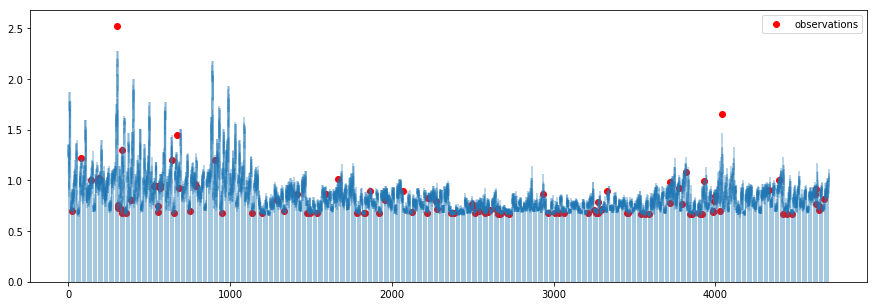

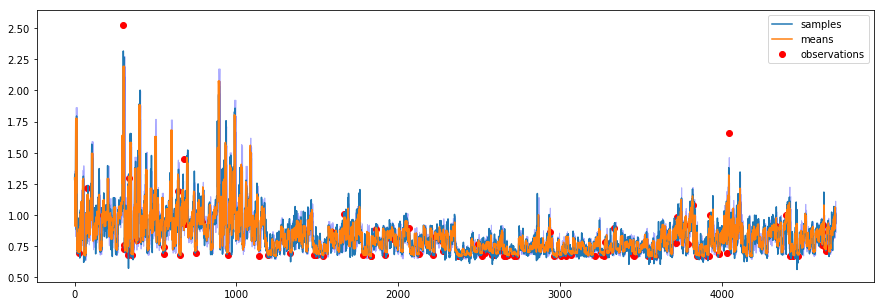

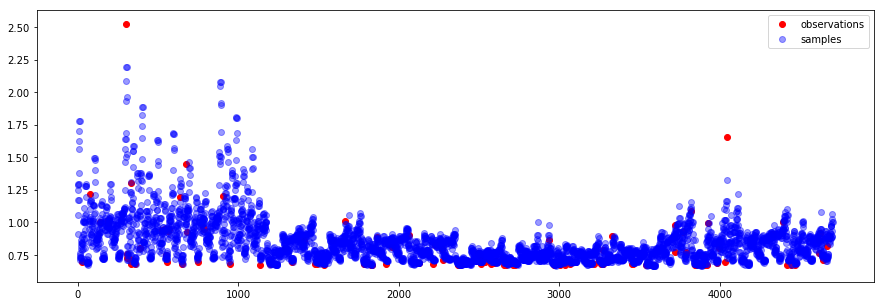

In [20]:
tg.goforit(10)
tg.plot_sample_grid()

length of the new dataset: (26, 42)
new X is in there: True
new y is in there: True
mean probability is 0.37168141592920356
length of the new dataset: (26, 50)
new X is in there: True
new y is in there: True
mean probability is 0.43859649122807015
length of the new dataset: (26, 47)
new X is in there: True
new y is in there: True
mean probability is 0.40869565217391307
length of the new dataset: (26, 45)
new X is in there: True
new y is in there: True
mean probability is 0.3879310344827586
length of the new dataset: (26, 40)
new X is in there: True
new y is in there: True
mean probability is 0.3418803418803419
length of the new dataset: (26, 41)
new X is in there: True
new y is in there: True
mean probability is 0.3474576271186441
length of the new dataset: (26, 43)
new X is in there: True
new y is in there: True
mean probability is 0.36134453781512604
length of the new dataset: (26, 39)
new X is in there: True
new y is in there: True
mean probability is 0.325
length of the new dataset

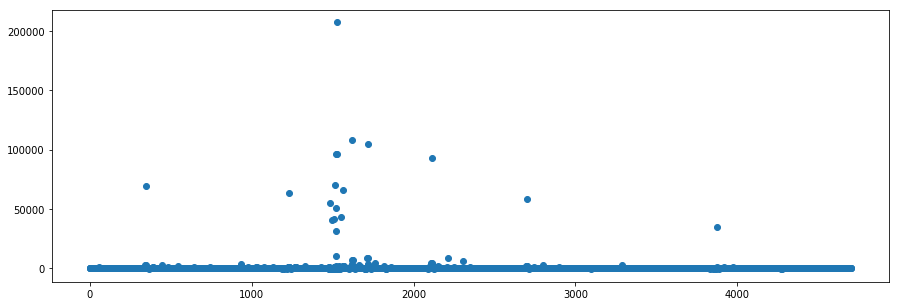

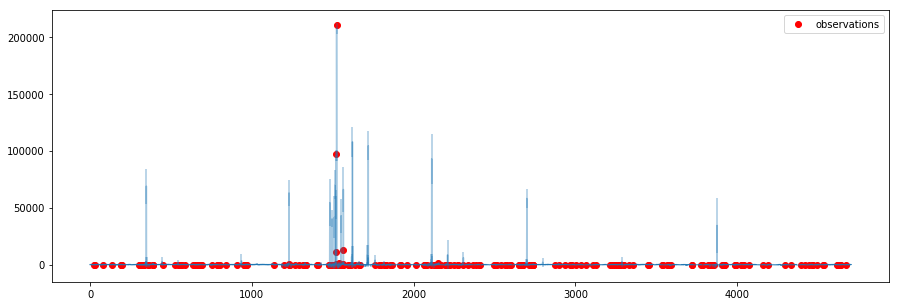

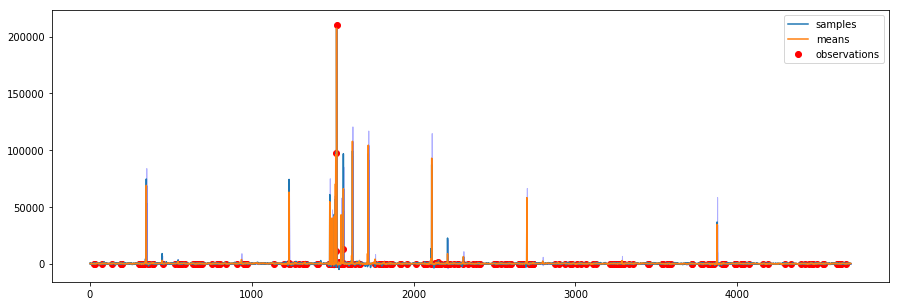

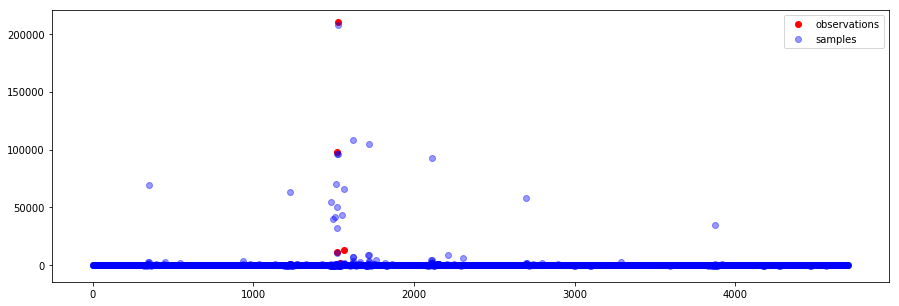

In [21]:
tg.goforit(100)
tg.plot_sample_grid()

In [22]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>],
   'initialisation_scheme': <function tensorflow.python.keras.initializers.he_normal(seed=None)>,
   'l2': False,
   'learning_rate': 0.1,
   'num_neurons': [5, 10, 5],
   'optimizer': tensorflow.python.training.adam.AdamOptimizer,
   'seed': 150},
  'score': 0.6731611135570761,
  'X': array([[0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.nn_ops.leaky_relu(features, alpha=0.2, na

In [23]:
tg.goforit(100)
tg.plot_sample_grid()

length of the new dataset: (26, 70)
new X is in there: True
new y is in there: True
mean probability is 0.3286384976525822
length of the new dataset: (26, 66)
new X is in there: True
new y is in there: True
mean probability is 0.308411214953271
length of the new dataset: (26, 62)
new X is in there: True
new y is in there: True
mean probability is 0.28837209302325584
length of the new dataset: (26, 68)
new X is in there: True
new y is in there: True
mean probability is 0.3148148148148148
length of the new dataset: (26, 71)
new X is in there: True
new y is in there: True
mean probability is 0.3271889400921659
length of the new dataset: (26, 61)
new X is in there: True
new y is in there: True
mean probability is 0.2798165137614679
length of the new dataset: (26, 69)
new X is in there: True
new y is in there: True
mean probability is 0.3150684931506849
length of the new dataset: (26, 82)
new X is in there: True
new y is in there: True
mean probability is 0.37272727272727274
length of the n

AssertionError: 

In [24]:
observed = tg.observed

In [25]:
scores_observed = [x['score'] for x in observed]

In [26]:
import matplotlib.pyplot as plt

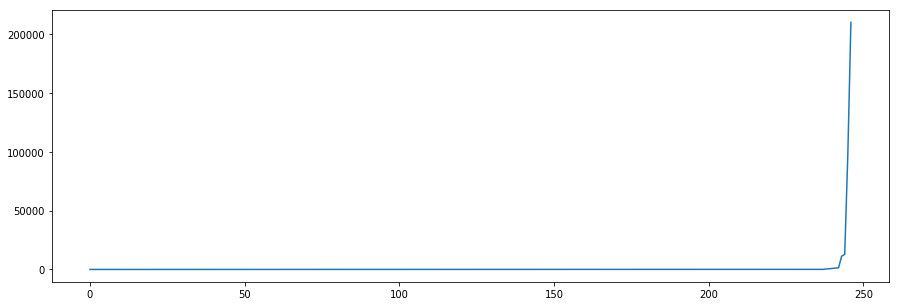

In [27]:
plt.plot(sorted(scores_observed))

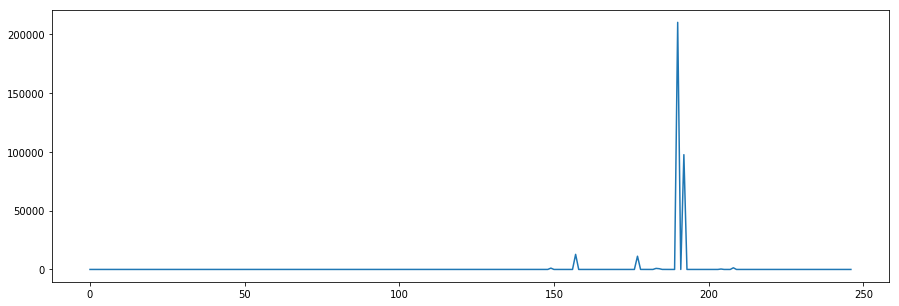

In [28]:
plt.plot(scores_observed)

In [29]:
sorted(scores_observed)[0]

0.6731611135570761

In [30]:
sorted(scores_observed)[-1]

nan

In [31]:
models_observed = [str(x['params']) for x in observed]
len(set(models_observed))

235

In [32]:
tg.goforit(100)
tg.plot_sample_grid()

length of the new dataset: (26, 69)
new X is in there: True
new y is in there: True
mean probability is 0.276


ValueError: scale < 0

In [ ]:
tg.goforit(100)
tg.plot_sample_grid()